# Homework 2

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive, FloatSlider
from datetime import datetime
import seaborn as sns

## Задача

Дана СЛАУ второго порядка, нужно отобразить на графике линии и точку их пересечения

$$a_{11}x + a_{12}y = b_1$$
$$a_{21}x + a_{22}y = b_2$$

ДЗ для заинтересованных - сделать виджет для управления коэффициентами системы и автоматической перестройки графиков

[Пример с кодом](https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets)

In [2]:
def plot_two_lines(a11, a12, a21, a22, b1, b2):
    if (a11 == 0 and a12 == 0) or (a21 == 0 and a22 == 0):
        print('Not a valid line system')
        return
    plt.figure(figsize=(6, 6))
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xticks(np.arange(-10, 11, 1))
    plt.yticks(np.arange(-10, 11, 1))
    if a11 == 0:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, b1 / a12 * np.ones(100))
    elif a12 == 0:
        y = np.linspace(-10, 10, 100)
        plt.plot(b1 / a11 * np.ones(100), y)
    else:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, (b1 - a11 * x) / a12)
    if a21 == 0:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, b2 / a22 * np.ones(100))
    elif a22 == 0:
        y = np.linspace(-10, 10, 100)
        plt.plot(b2 / a21 * np.ones(100), y)
    else:
        x = np.linspace(-10, 10, 100)
        plt.plot(x, (b2 - a21 * x) / a22)

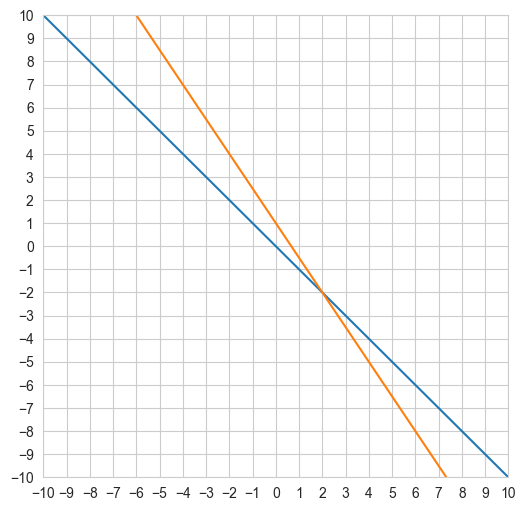

In [3]:
plot_two_lines(1, 1, 3, 2, 0, 2)

In [4]:
FS = FloatSlider(value=1, min=-5, max=5, step=0.5)
interactive_plot = interactive(plot_two_lines, a11=FloatSlider(value=1, min=-5, max=5, step=0.2),
                               a12=FloatSlider(value=-3.5, min=-5, max=5, step=0.2),
                               a21=FloatSlider(value=1, min=-5, max=5, step=0.2),
                               a22=FloatSlider(value=1, min=-5, max=5, step=0.2),
                               b1=FloatSlider(value=0, min=-5, max=5, step=0.2),
                               b2=FloatSlider(value=1, min=-5, max=5, step=0.2))

In [5]:
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a11', max=5.0, min=-5.0, step=0.2), FloatSlider(valu…

## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [6]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [7]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [8]:
df['Complain'].value_counts()  # видим, что 1 - жалоба, 0 - её отсутствие

Complain
0    2219
1      21
Name: count, dtype: int64

In [9]:
number_of_complains = df.Complain.sum()
number_of_complains

21

In [10]:
df['MntFruits'].sample(5)

857     64
220     11
1370     6
863     35
903     21
Name: MntFruits, dtype: int64

In [11]:
cur_year = datetime.now().year
df['years'] = df['Year_Birth'].apply(lambda x: cur_year - x)  # давайте посчитаем возраст каждого человека в годах

In [12]:
purchases = df.filter(regex="Mnt*").sum(axis=1)

In [13]:
customers = df[purchases > 0]
df.shape, customers.shape  # как видим, в датасете все покупали что-то 

((2240, 30), (2240, 30))

In [14]:
mean_age_customers = customers['years'].mean()
mean_age = df['years'].mean()
mean_age, mean_age_customers  # видим, что средний возраст не отличается 

(55.19419642857143, 55.19419642857143)


### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

In [15]:
cols = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
        'Recency', 'NumWebPurchases', 'NumStorePurchases', 'years']
len(cols)

9

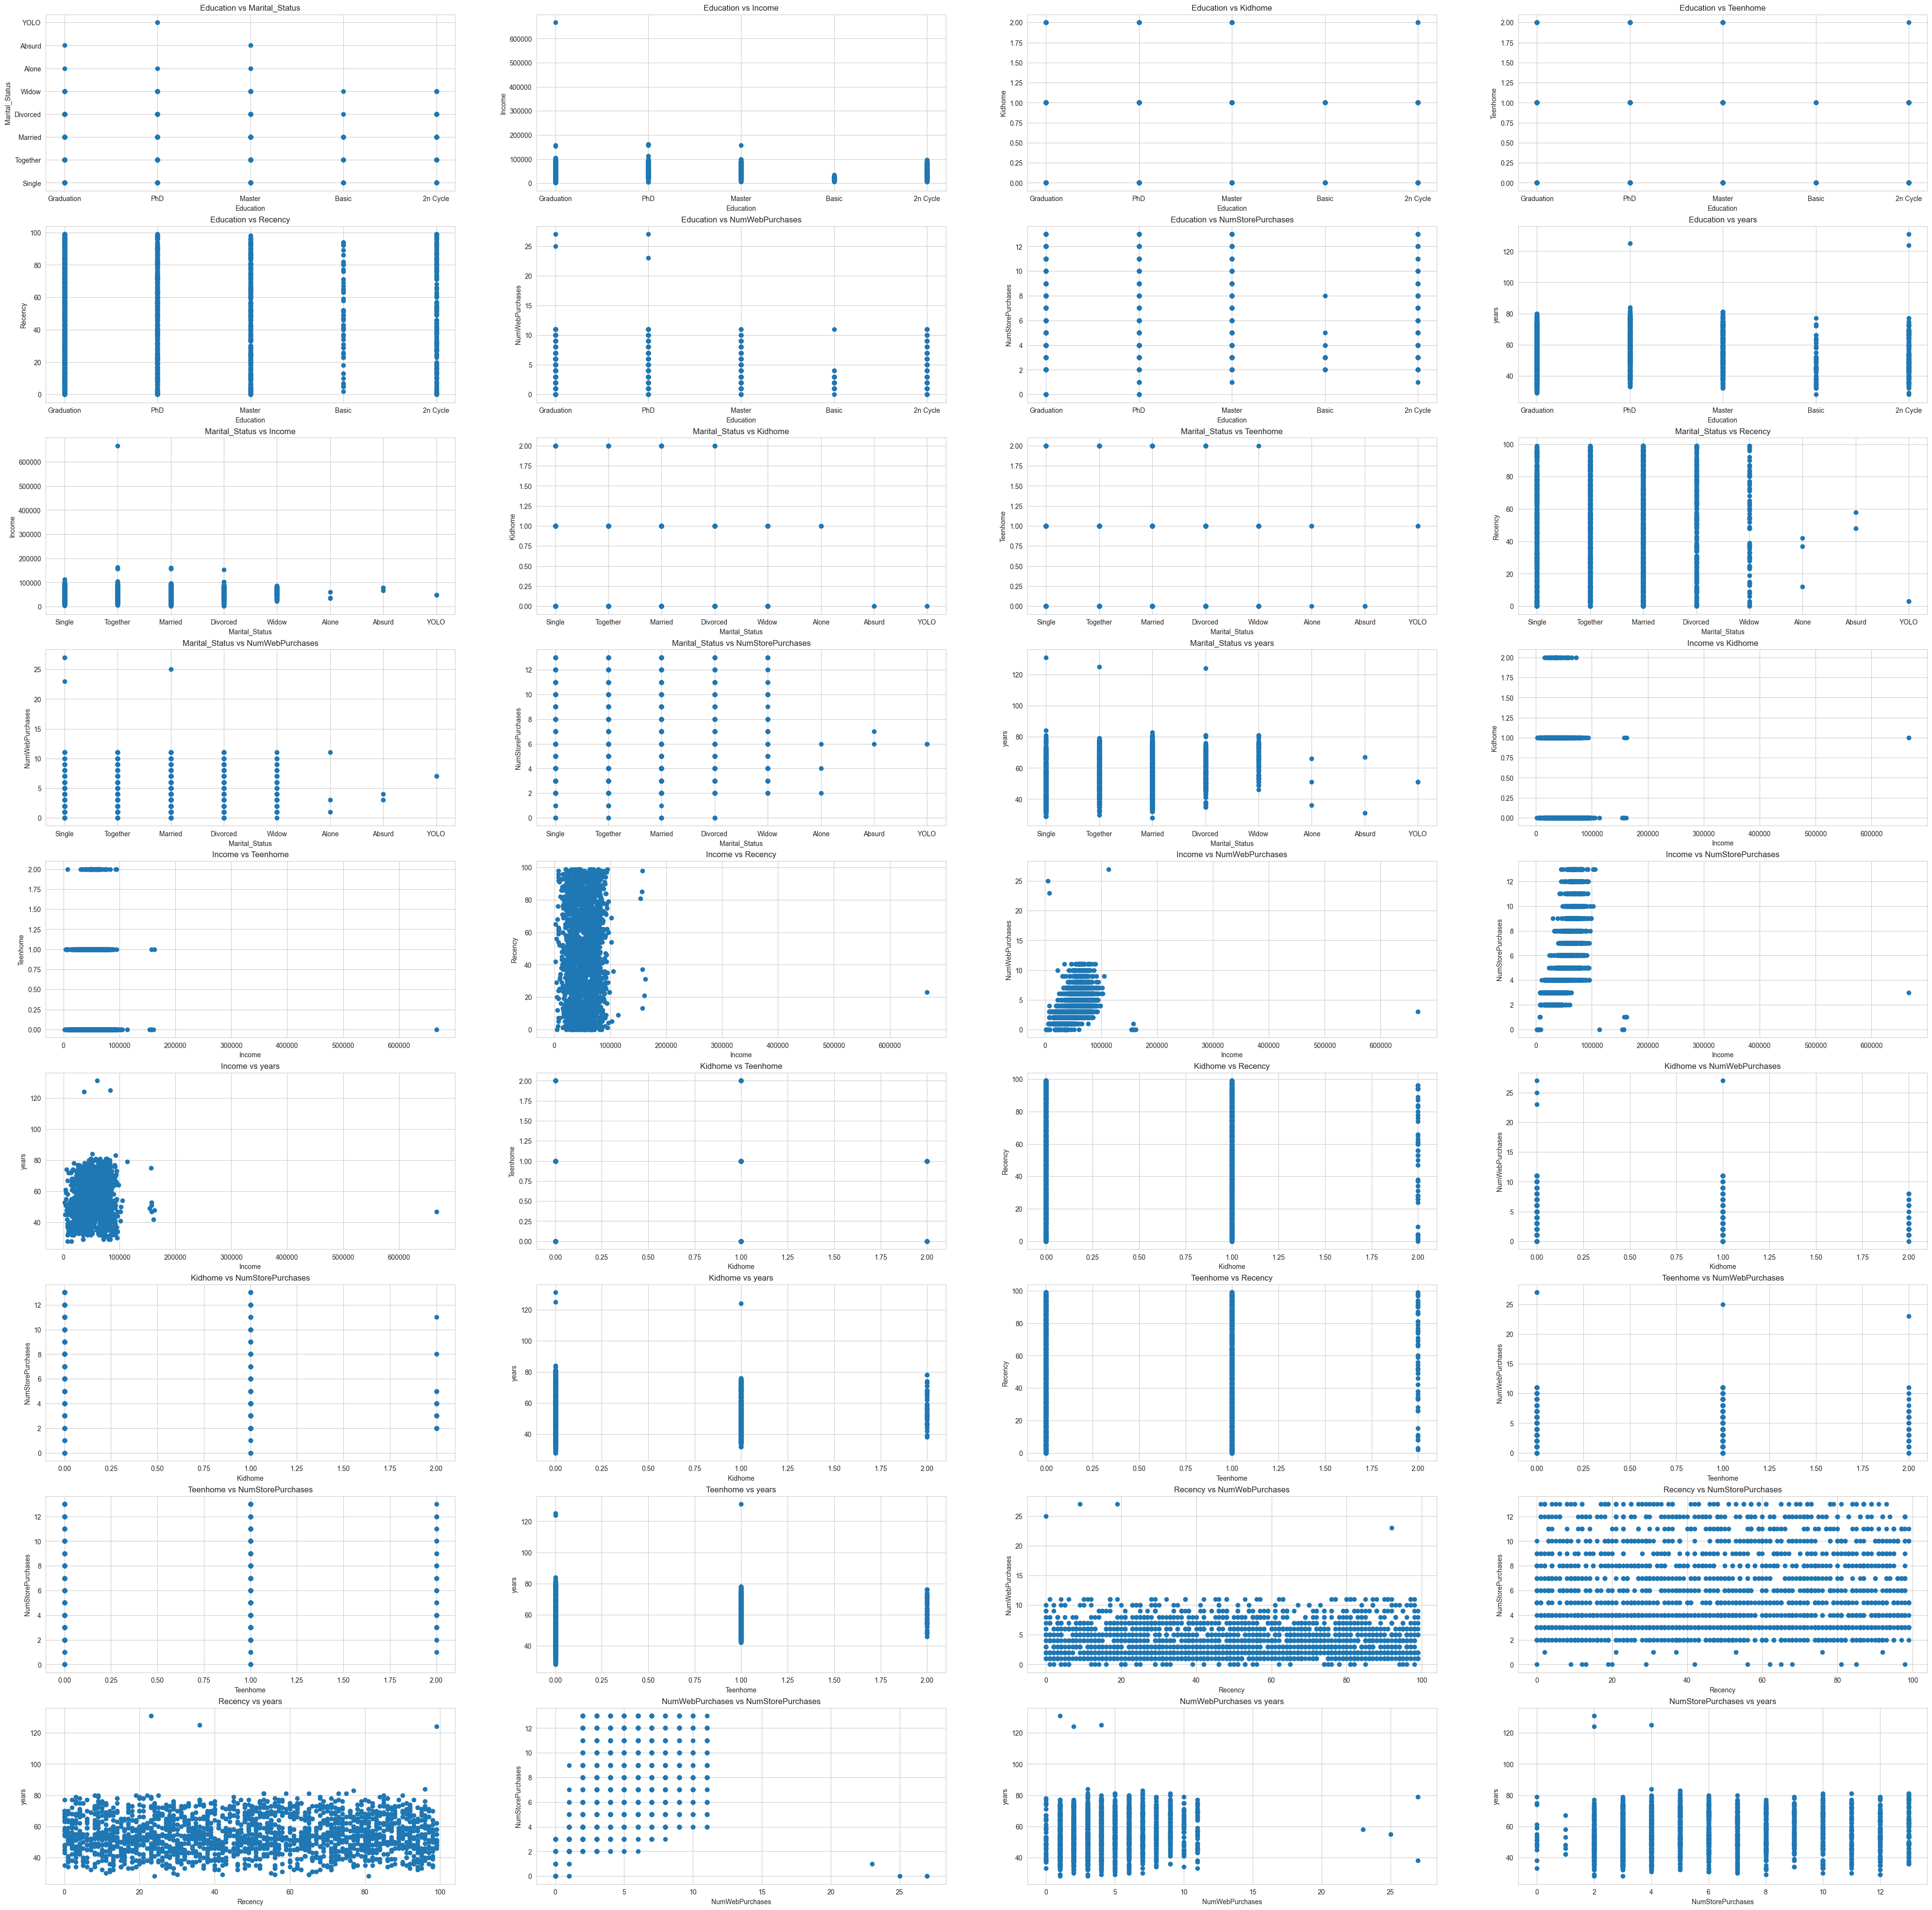

In [16]:
fig, axes = plt.subplots(9, 4, figsize=(50, 50))
x, y = 0, 0
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols[i + 1:]):
        axes[x, y].scatter(df[col1], df[col2])
        axes[x, y].set_title(col1 + " vs " + col2)
        axes[x, y].set_xlabel(col1)
        axes[x, y].set_ylabel(col2)
        y += 1
        if y == 4:
            y = 0
            x += 1
plt.show()

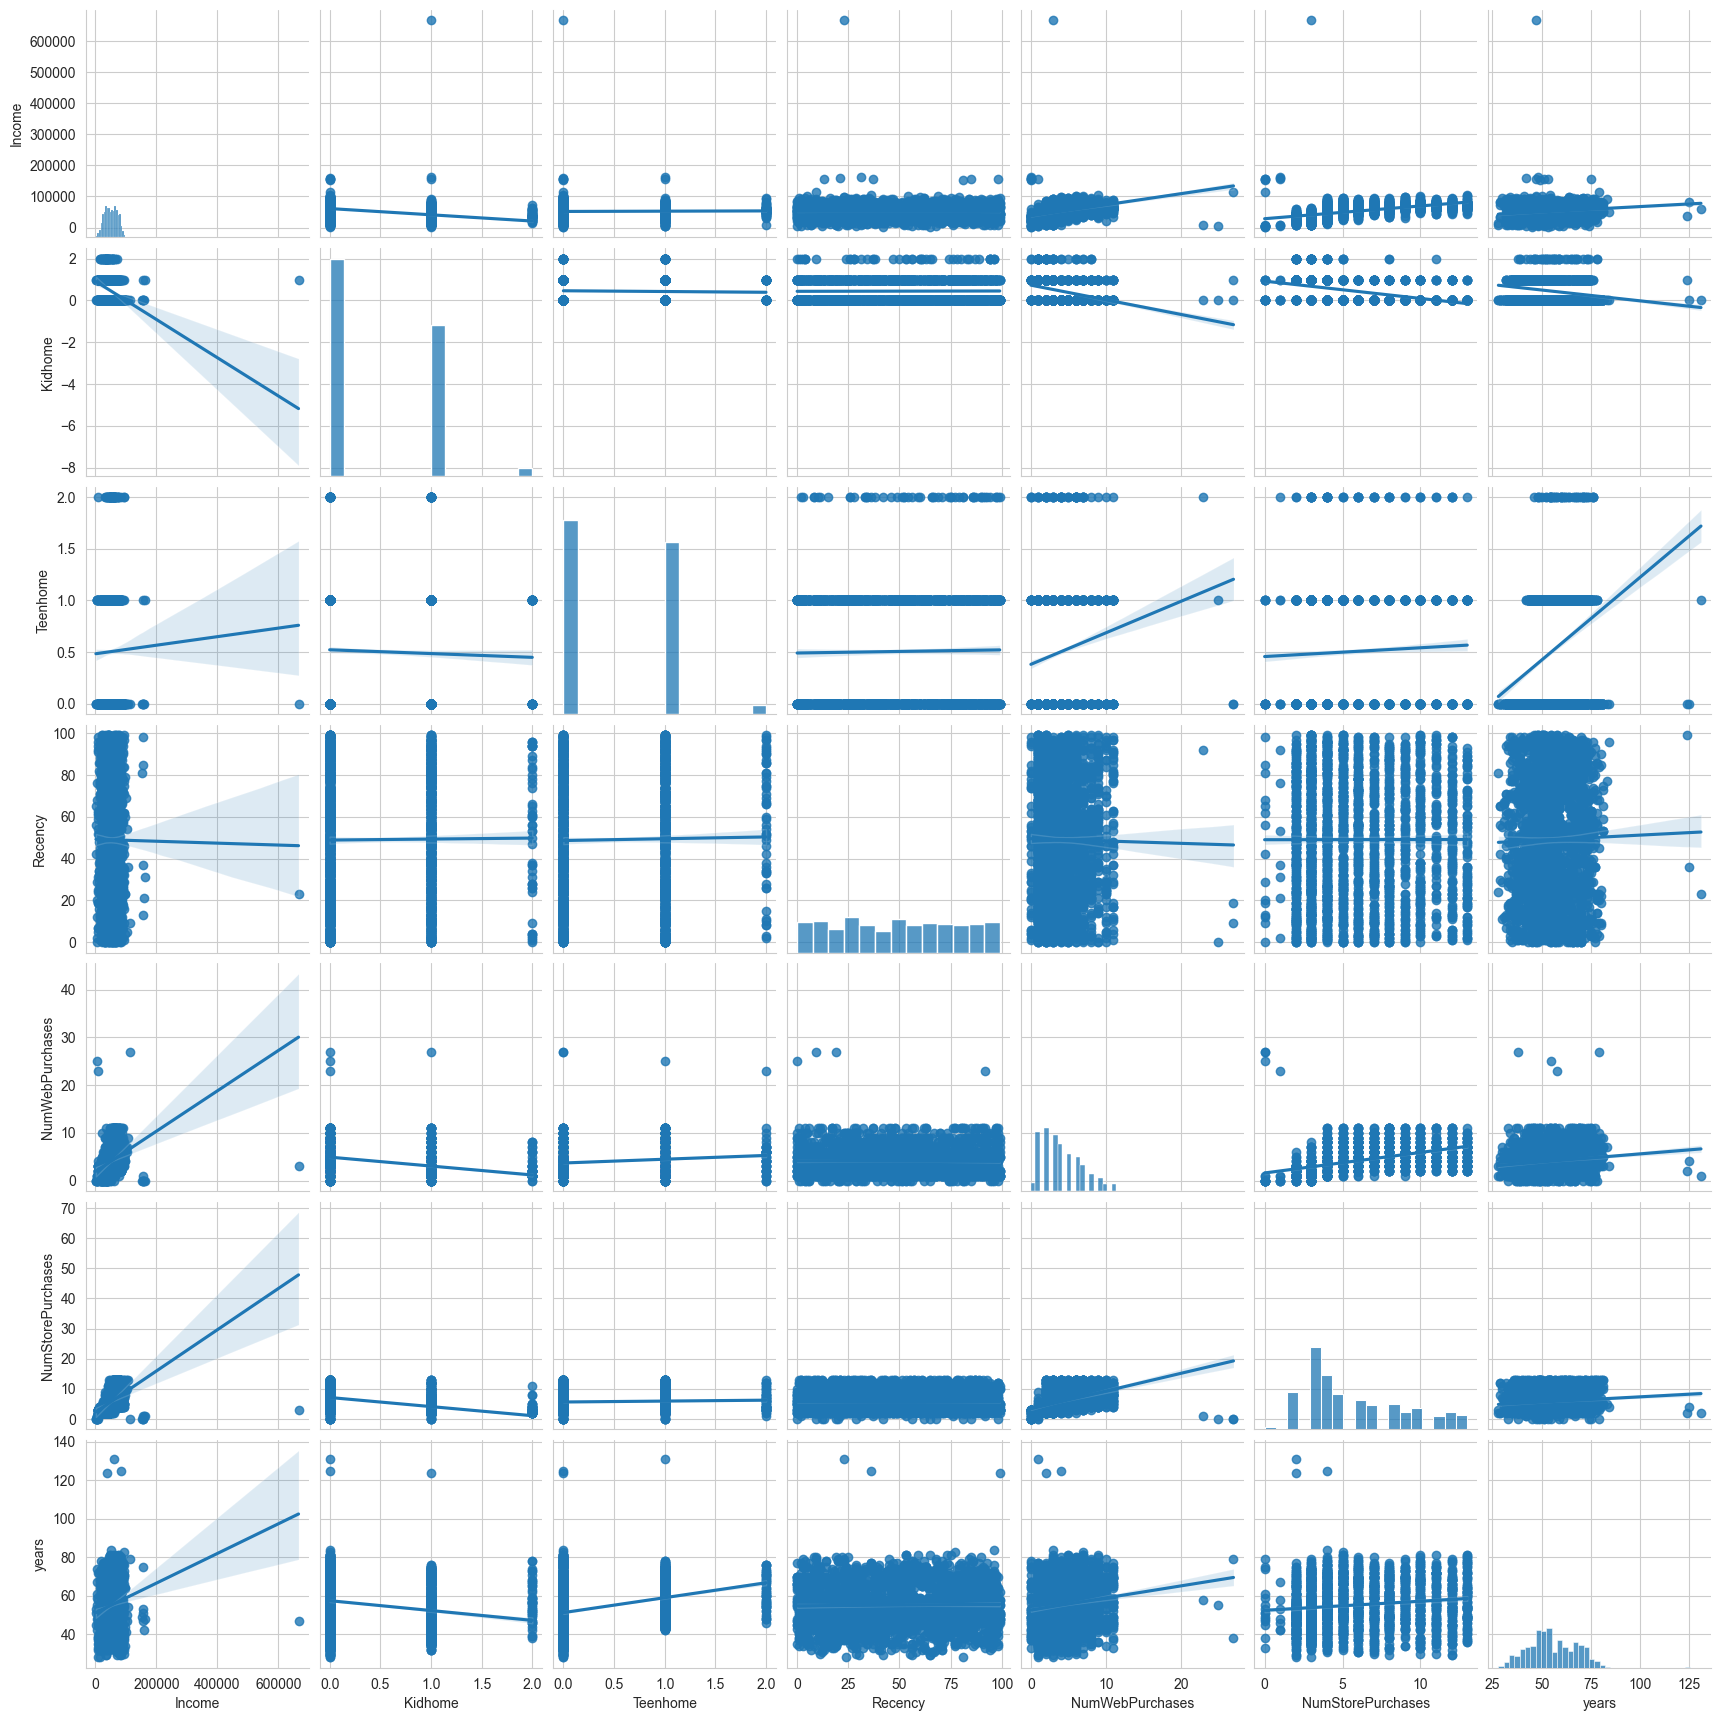

In [17]:
sns.pairplot(df[cols], kind="reg");

Как видим, самые понятные зависимости - между доходом и числом покупок (в среднем, чем выше доход, тем больше покупали).
Также интересно, что люди разных возрастов почти одинаково покупают в онлайн. Можно увидеть несколько "выбросов" и на графике сравнения онлайн и офлайн покупок (люди, которые покупают только онлайн). Вдовы и одиночки в среднем зарабатывают меньше остальных.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

Предлагаю считать ЦА тех людей, для которых метрика логистической регрессии будет больше 0.8 (предсказанная вероятность положительного ответа). Также давайте предварительно выкинем выбросы (по доходам) и пропуски.

In [18]:
def drop_outliers(df, col):
    if col not in df.columns:
        print(f'Column {col} not found')
        return None
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]

In [19]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
years                   0
dtype: int64

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df_noout = drop_outliers(df, 'Income')
print("Number of outliers in the Income column:", df.shape[0] - df_noout.shape[0])

Number of outliers in the Income column: 8


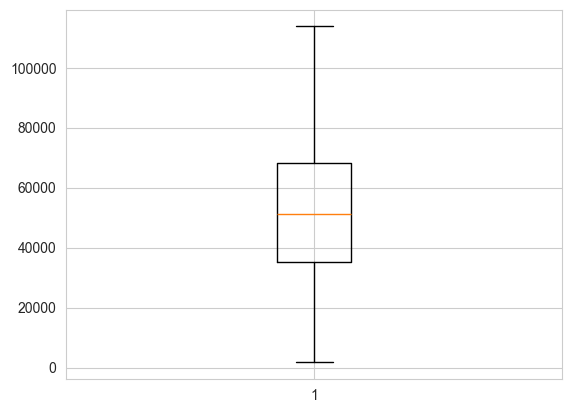

In [22]:
df = df_noout
plt.boxplot(df['Income'])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   int64 

In [25]:
cols_obj = [col for col in df.columns if df[col].dtype == 'object']
cols_obj

['Education', 'Marital_Status', 'Dt_Customer']

In [26]:
df['Education'].value_counts() 

Education
Graduation    1113
PhD            477
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [27]:
df['Marital_Status'].value_counts() 

Marital_Status
Married     854
Together    569
Single      471
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [28]:
df['Dt_Customer'].value_counts() 

Dt_Customer
31.08.2012    12
14.02.2013    11
12.09.2012    11
12.05.2014    11
20.08.2013    10
              ..
04.02.2014     1
20.07.2013     1
27.12.2012     1
23.08.2012     1
09.01.2014     1
Name: count, Length: 662, dtype: int64

In [29]:
df.drop('Dt_Customer', inplace=True, axis=1) # слишком много уникальных значений

In [30]:
df_dummies = pd.get_dummies(df)
df.shape, df_dummies.shape  

((2208, 29), (2208, 40))

In [31]:
df = df_dummies

In [32]:
X = df.drop('Response', axis=1)
y = df['Response']
X.shape, y.shape 

((2208, 39), (2208,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5421)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1766, 39), (1766,), (442, 39), (442,))

In [35]:
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.3, C=2, solver='saga', max_iter=10000, n_jobs=-1)

In [36]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, precision, recall, f1

(0.832579185520362, 0.8, 0.1, 0.17777777777777778)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       362
           1       0.80      0.10      0.18        80

    accuracy                           0.83       442
   macro avg       0.82      0.55      0.54       442
weighted avg       0.83      0.83      0.77       442


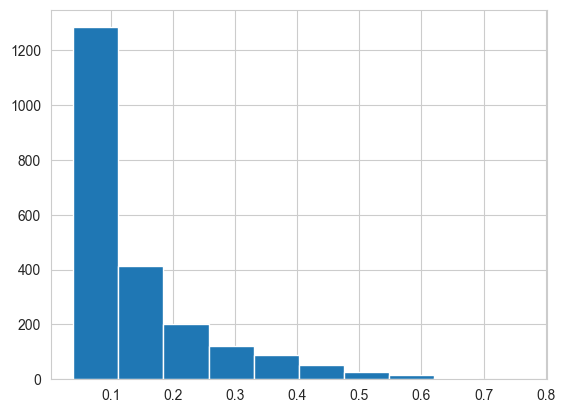

In [39]:
target_pred = pd.Series(model.predict_proba(X)[:, 1])
plt.hist(target_pred);

In [40]:
df.shape, target_pred.shape

((2208, 40), (2208,))

In [41]:
filter = target_pred > target_pred.quantile(0.6)
filter

0        True
1       False
2        True
3       False
4       False
        ...  
2203     True
2204    False
2205     True
2206     True
2207    False
Length: 2208, dtype: bool

In [42]:
target = df.iloc[list(filter)]
target.shape

(883, 40)

In [43]:
target.sample(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1869,2186,1977,82326.0,0,0,30,938,142,754,159,...,False,False,False,False,False,False,False,True,False,False
1297,5543,1966,57811.0,0,1,49,545,7,114,37,...,False,False,False,False,False,False,False,True,False,False
161,9260,1945,70356.0,0,0,20,1349,16,249,43,...,False,True,False,False,False,True,False,False,False,False
1691,6349,1987,61787.0,0,0,71,621,73,414,78,...,True,False,False,False,True,False,False,False,False,False
2010,2002,1958,71964.0,0,0,81,587,51,932,180,...,False,False,False,False,True,False,False,False,False,False
878,1446,1956,86424.0,0,0,12,387,68,569,89,...,True,False,False,False,False,False,True,False,False,False
1559,2793,1976,70179.0,0,1,10,532,88,168,69,...,False,True,False,False,True,False,False,False,False,False
984,5718,1950,80763.0,0,0,17,674,168,108,192,...,False,False,False,False,False,True,False,False,False,False
1647,7005,1981,58684.0,0,0,71,479,35,179,28,...,False,False,False,False,False,False,True,False,False,False
932,7922,1951,64950.0,0,1,29,819,0,72,12,...,False,True,False,False,False,False,True,False,False,False


In [44]:
target['Income'].mean(), df['Income'].mean()

(69257.76217440543, 51633.63813405797)